In [ ]:
!pip install inference
#this is imported to call the api form roboflow
!pip install easyocr
#easy ocr stands for optical character reconization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.6/332.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.4/262.4 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import cv2#imports opencv libraries
import numpy as np
import easyocr
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image


In [ ]:
image_path="/content/sample_data/WhatsApp Image 2024-03-22 at 11.30.30_76f6fe51.jpg"

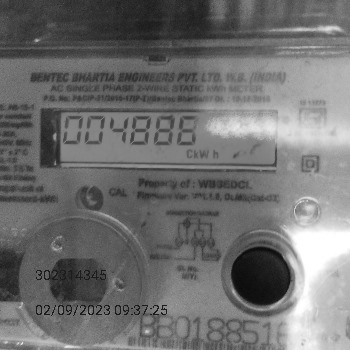

In [ ]:
image=cv2.imread(image_path,0)#loading the image
cv2_imshow(image)#displays the image

In [ ]:
#function to preprocess the image
def preprocess(image):
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])#sharpening the image
    sharpen = cv2.filter2D(image, -1, sharpen_kernel)
    adjusted = cv2.convertScaleAbs(sharpen, alpha=1.5, beta=10)#increases the brightness and saturation
    return adjusted#returning the preprocessed image


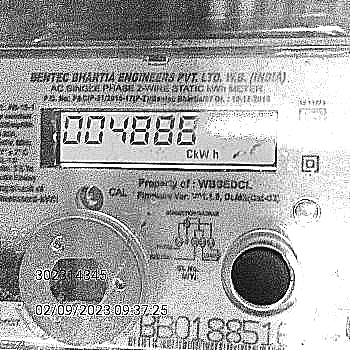

In [ ]:
new_image=preprocess(image)
cv2_imshow(new_image)

In [ ]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="fuOy83MqlC1LtKZ25J0p"
)

results = CLIENT.infer(image, model_id="number-detection-for-v9/3")

In [ ]:
# Get the predictions from the result
predictions = results['predictions']
white_background = np.full_like(image, (255), dtype=np.uint8)#makes a custom white coloured background for better presentation
# Loop through the predictions and draw bounding boxes
for prediction in predictions:
    # Get the bounding box coordinates
    x = int(prediction['x'])
    y = int(prediction['y'])
    width = int(prediction['width'])
    height = int(prediction['height'])

    # Draw the bounding box on the image
    cv2.rectangle(new_image, (x-int(width/2), y-int(height/2)), (x + int(width/2), y + int(height/2)), (0, 0, 255), 2)
    # Get the class ID
    class_id = prediction['class']
    # Print the class name on top of the bounding box
    cv2.putText(new_image, class_id, (x-int(height), y-int(width)), cv2.FONT_HERSHEY_SIMPLEX, .7, (0, 0, 0), 2)
    cv2.putText(white_background, class_id, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2) #puts the text also on the white background for later purposes

In [ ]:

from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="fuOy83MqlC1LtKZ25J0p"
)

#result = CLIENT.infer(your_image.jpg, model_id="digit-0s4qo/9")
# infer on a local image
crop = CLIENT.infer(image, model_id="meter-display-yqxh9/1")
crop


{'time': 0.03340026399996532,
 'image': {'width': 350, 'height': 350},
 'predictions': [{'x': 151.0,
   'y': 135.5,
   'width': 272.0,
   'height': 103.0,
   'confidence': 0.5534810423851013,
   'class': 'meter-display',
   'class_id': 0,
   'detection_id': 'acb48d95-4a8e-457f-ae27-ade6cd10004a'}]}

In [ ]:
crop

{'time': 0.03340026399996532,
 'image': {'width': 350, 'height': 350},
 'predictions': [{'x': 151.0,
   'y': 135.5,
   'width': 272.0,
   'height': 103.0,
   'confidence': 0.5534810423851013,
   'class': 'meter-display',
   'class_id': 0,
   'detection_id': 'acb48d95-4a8e-457f-ae27-ade6cd10004a'}]}

In [ ]:
#handls the data form the array and makes it easier to handel during the bounding box drawing
jd=crop['predictions']
jd=jd[0]
x=int(jd['x'])
y=int(jd['y'])
height=int(jd['height'])
width=int(jd['width'])
print(x)
print(y)

151
135


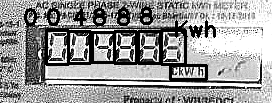

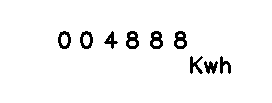


The meter reading is : 004888','Kwh


In [ ]:
# Loop through the predictions and draw bounding boxes
x0 = int(x - width/ 2)
x1 = int(x + width / 2)
y0 = int(y - height / 2)
y1 = int(y+ height/ 2)
# Crop the bounding box region from the image
cropped_image = new_image[y0:y1, x0:x1]
white_background=white_background[y0:y1, x0:x1]
# Display the cropped bounding box region
cv2_imshow(cropped_image)

cv2_imshow(white_background)
import string
#detect text using easy ocr
reader = easyocr.Reader(['en'])
output = str(reader.readtext(white_background,detail=0))
output=output.translate({ord(c): None for c in string.whitespace})
output=output[2:]
output=output[:-2]
print()
print("The meter reading is :",output,)